# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ All libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 1.26.4


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
import json
import os, shutil

# Setup Kaggle API
kaggle_dir = os.path.expanduser('~/.kaggle')
os.makedirs(kaggle_dir, exist_ok=True)

kaggle_json_path = 'kaggle.json'

kaggle_dest = os.path.join(kaggle_dir, 'kaggle.json')
shutil.copy(kaggle_json_path, kaggle_dest)

os.chmod(kaggle_dest, 0o600)

print("Kaggle credentials configured successfully!")

Kaggle credentials configured successfully!


In [4]:
# Download Heart Disease Dataset from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("neurocipher/heartdisease")
print("Path to dataset files:", path)

# Load the dataset
import os

# Find CSV file in the downloaded path
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print(f"\nAvailable CSV files: {csv_files}")

# Load the main dataset
df = pd.read_csv(os.path.join(path, csv_files[0]))

print(f"\n✅ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")

# Display first few rows
print("\n📊 First 5 rows of the dataset:")
print(df.head())

# ========================================
# Save Raw Dataset to preprocessing folder
# ========================================

print("\n" + "="*60)
print("SAVING RAW DATASET")
print("="*60)

# Create preprocessing folder if not exists
preprocessing_folder = 'preprocessing'
if not os.path.exists(preprocessing_folder):
    os.makedirs(preprocessing_folder)
    print(f"✅ Created folder: {preprocessing_folder}")

# Create dataset_raw subfolder
raw_dataset_folder = os.path.join(preprocessing_folder, 'dataset_raw')
if not os.path.exists(raw_dataset_folder):
    os.makedirs(raw_dataset_folder)
    print(f"✅ Created folder: {raw_dataset_folder}")

# Save raw dataset
raw_dataset_path = os.path.join(raw_dataset_folder, csv_files[0])
df.to_csv(raw_dataset_path, index=False)

print(f"\n✅ Raw dataset saved to: {raw_dataset_path}")
print(f"Dataset shape: {df.shape}")
print(f"File size: {os.path.getsize(raw_dataset_path) / 1024:.2f} KB")

Path to dataset files: C:\Users\I5\.cache\kagglehub\datasets\neurocipher\heartdisease\versions\1

Available CSV files: ['Heart_Disease_Prediction.csv']

✅ Dataset loaded successfully!
Dataset shape: (270, 14)
Total samples: 270
Total features: 14

📊 First 5 rows of the dataset:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

DATASET INFORMATION

Dataset Shape: (270, 14)
Number of Samples: 270
Number of Features: 14

COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium              

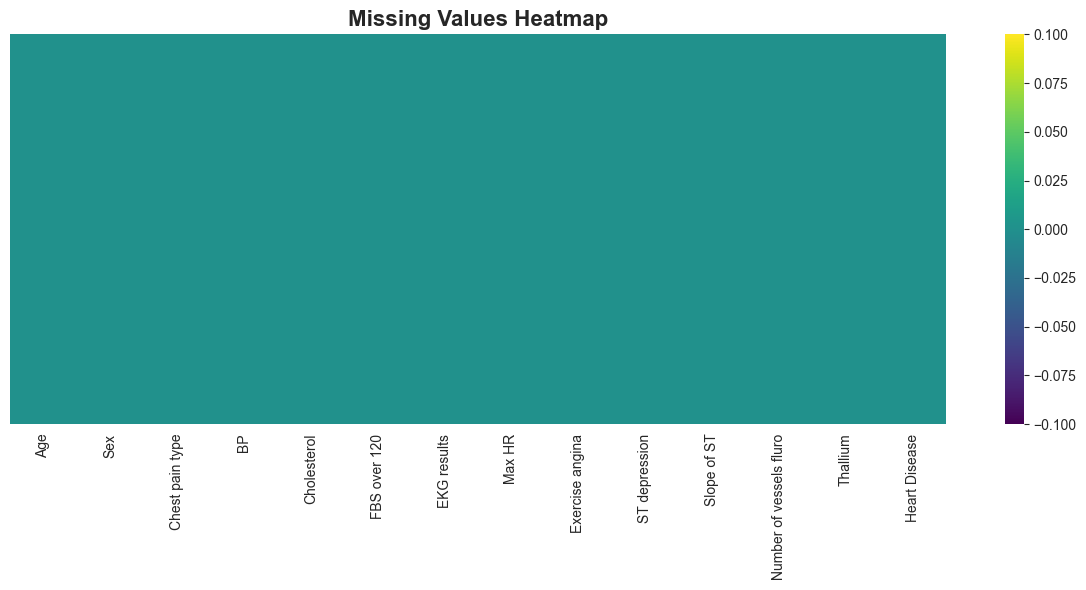


DUPLICATE VALUES ANALYSIS
Number of duplicate rows: 0
✅ No duplicate rows found!

TARGET VARIABLE ANALYSIS
Target Column: 'Heart Disease'

Value Counts:
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

Percentage Distribution:
Heart Disease
Absence     55.555556
Presence    44.444444
Name: proportion, dtype: float64


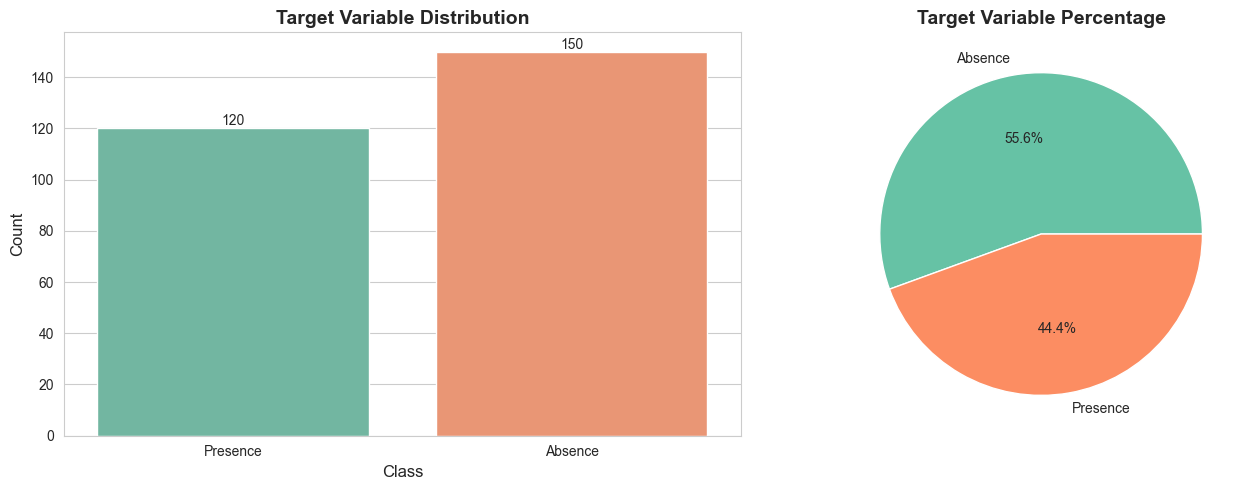


📊 Class Imbalance Ratio: 1.25
✅ Dataset is relatively balanced.

NUMERICAL FEATURES ANALYSIS
Numerical features: 13
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


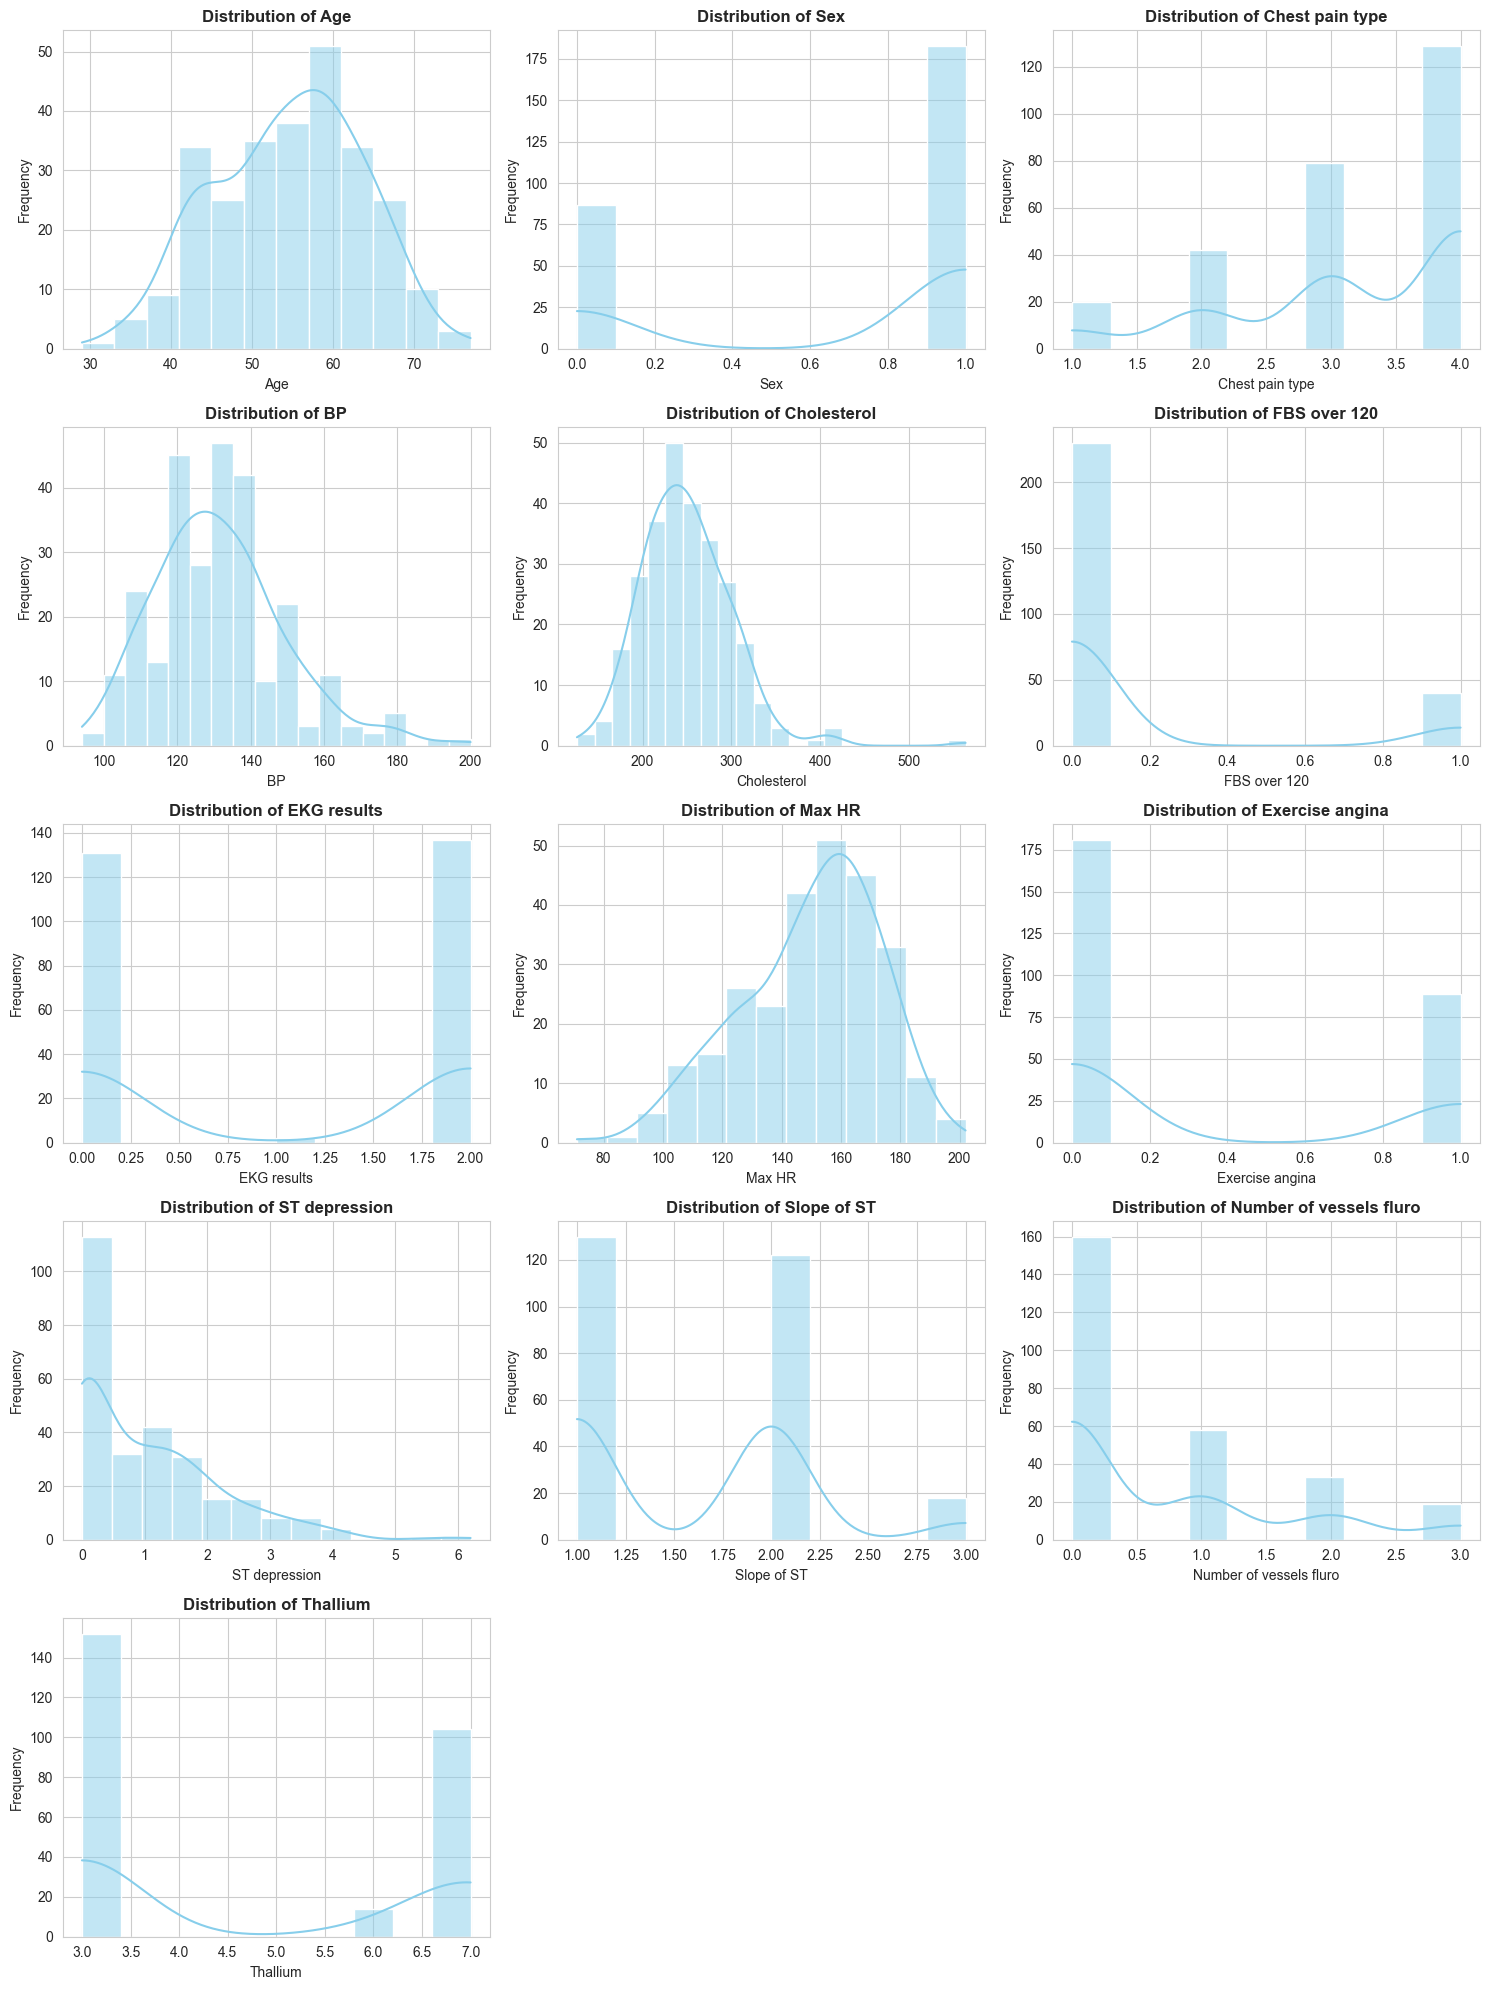

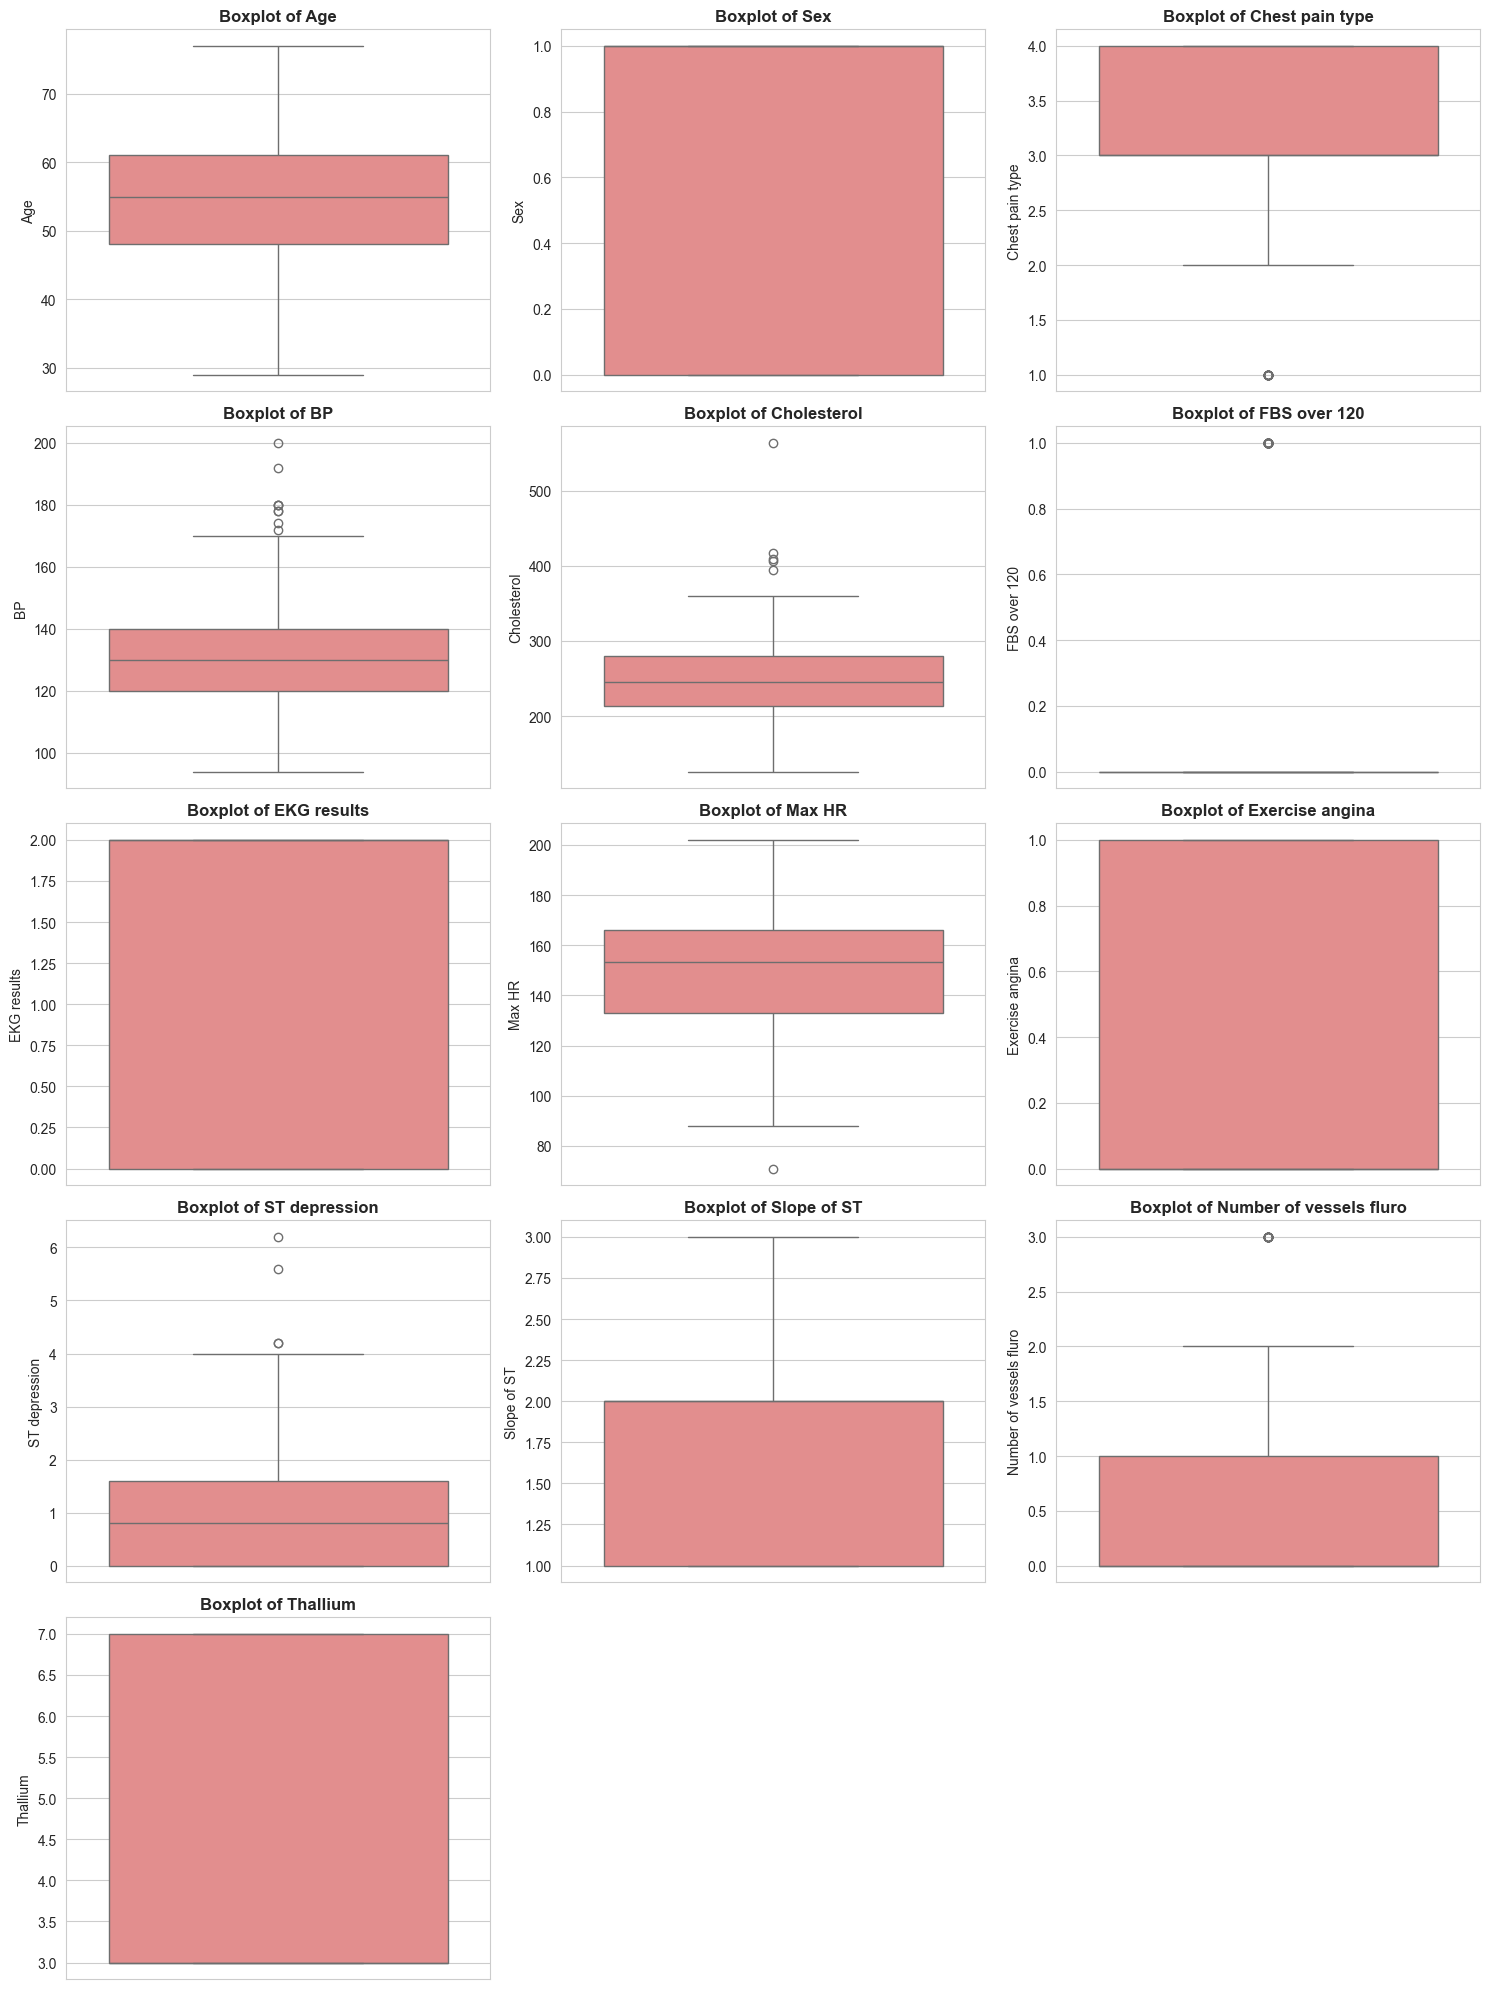


CATEGORICAL FEATURES ANALYSIS
Categorical features: 8
['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


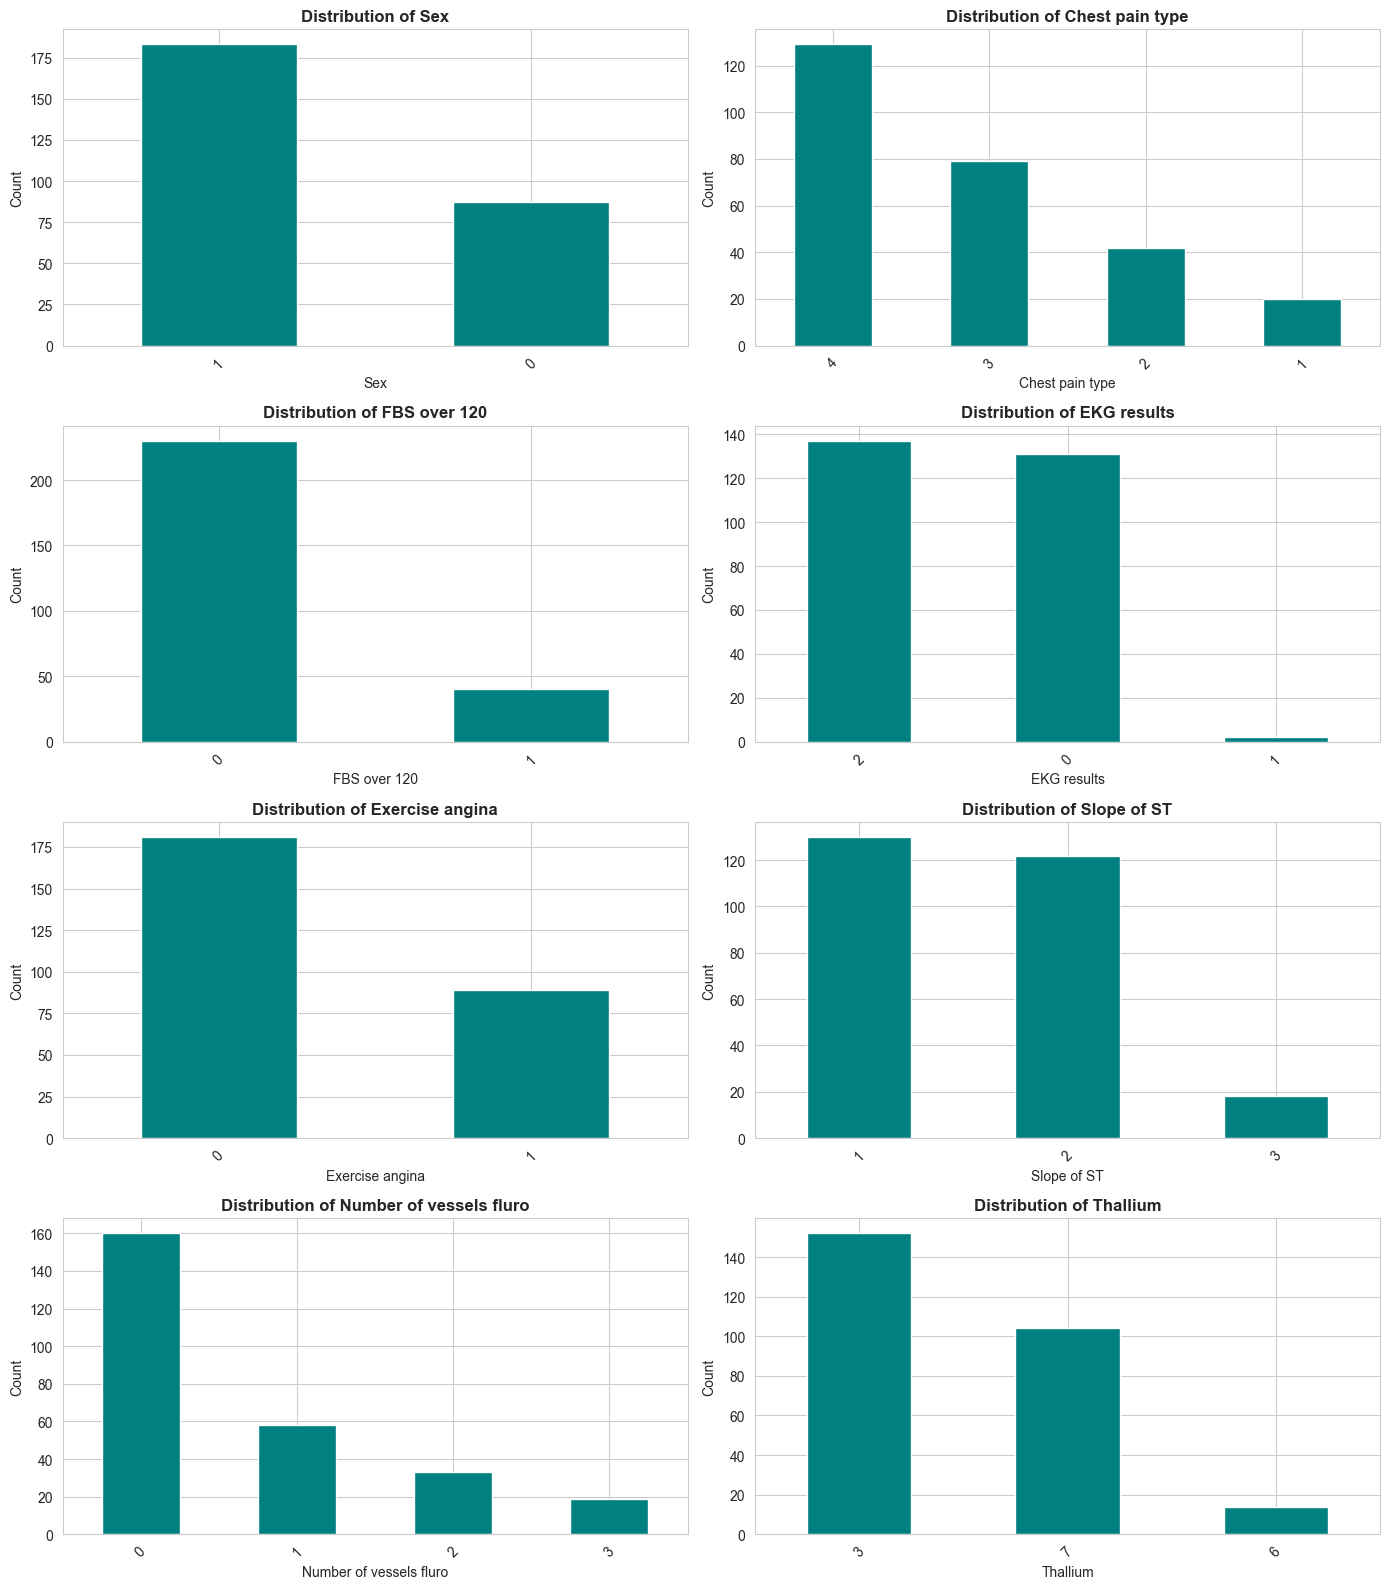


CORRELATION ANALYSIS
Target column 'Heart Disease' is non-numeric (e.g. string labels: ['Presence' 'Absence']). Skipping target in correlation matrix.


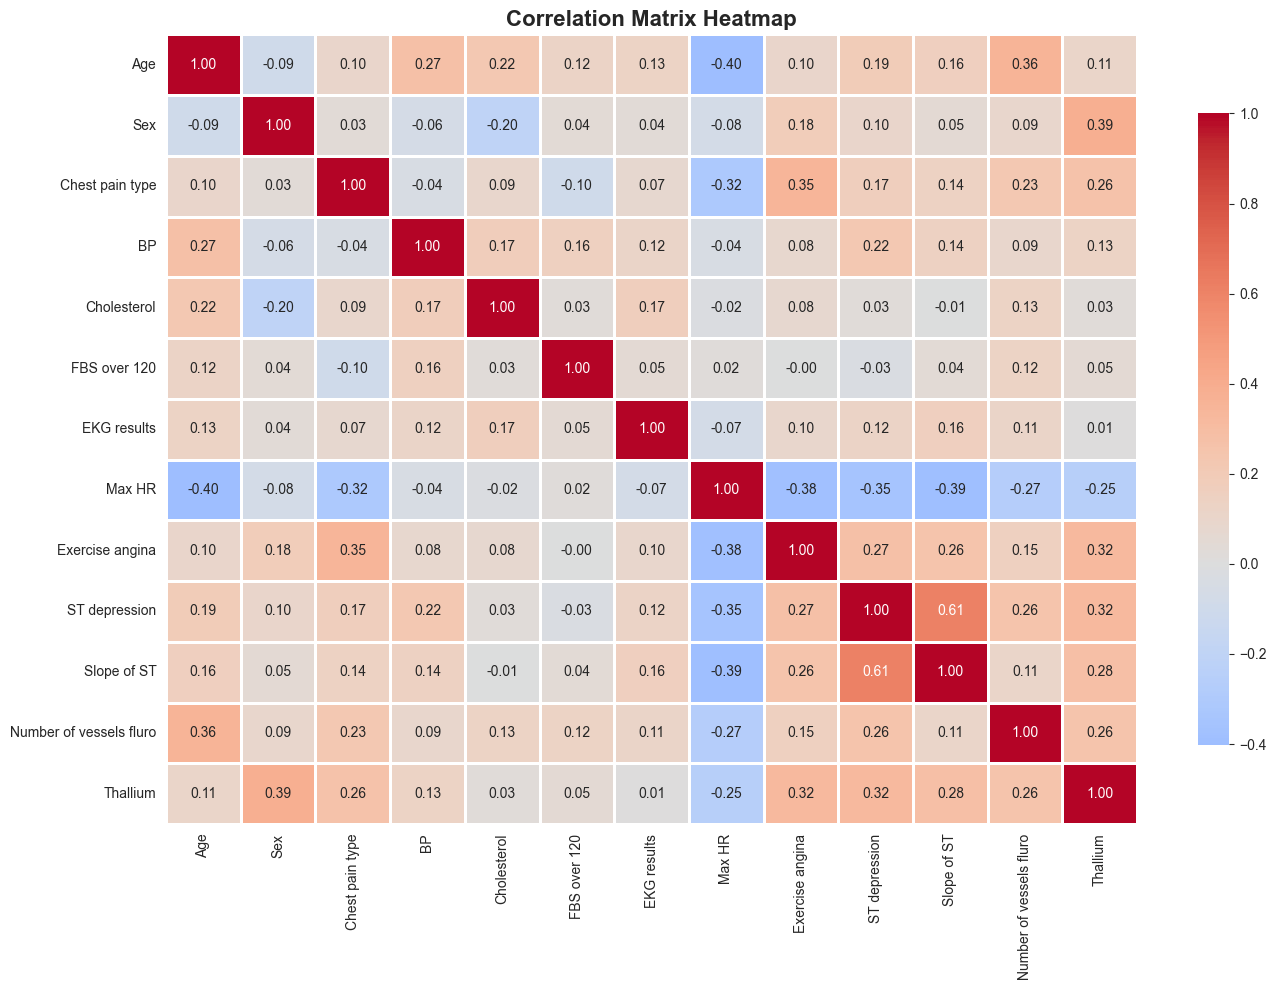

Target column 'Heart Disease' is not numeric, skipping correlation with target.

FEATURE RELATIONSHIPS WITH TARGET


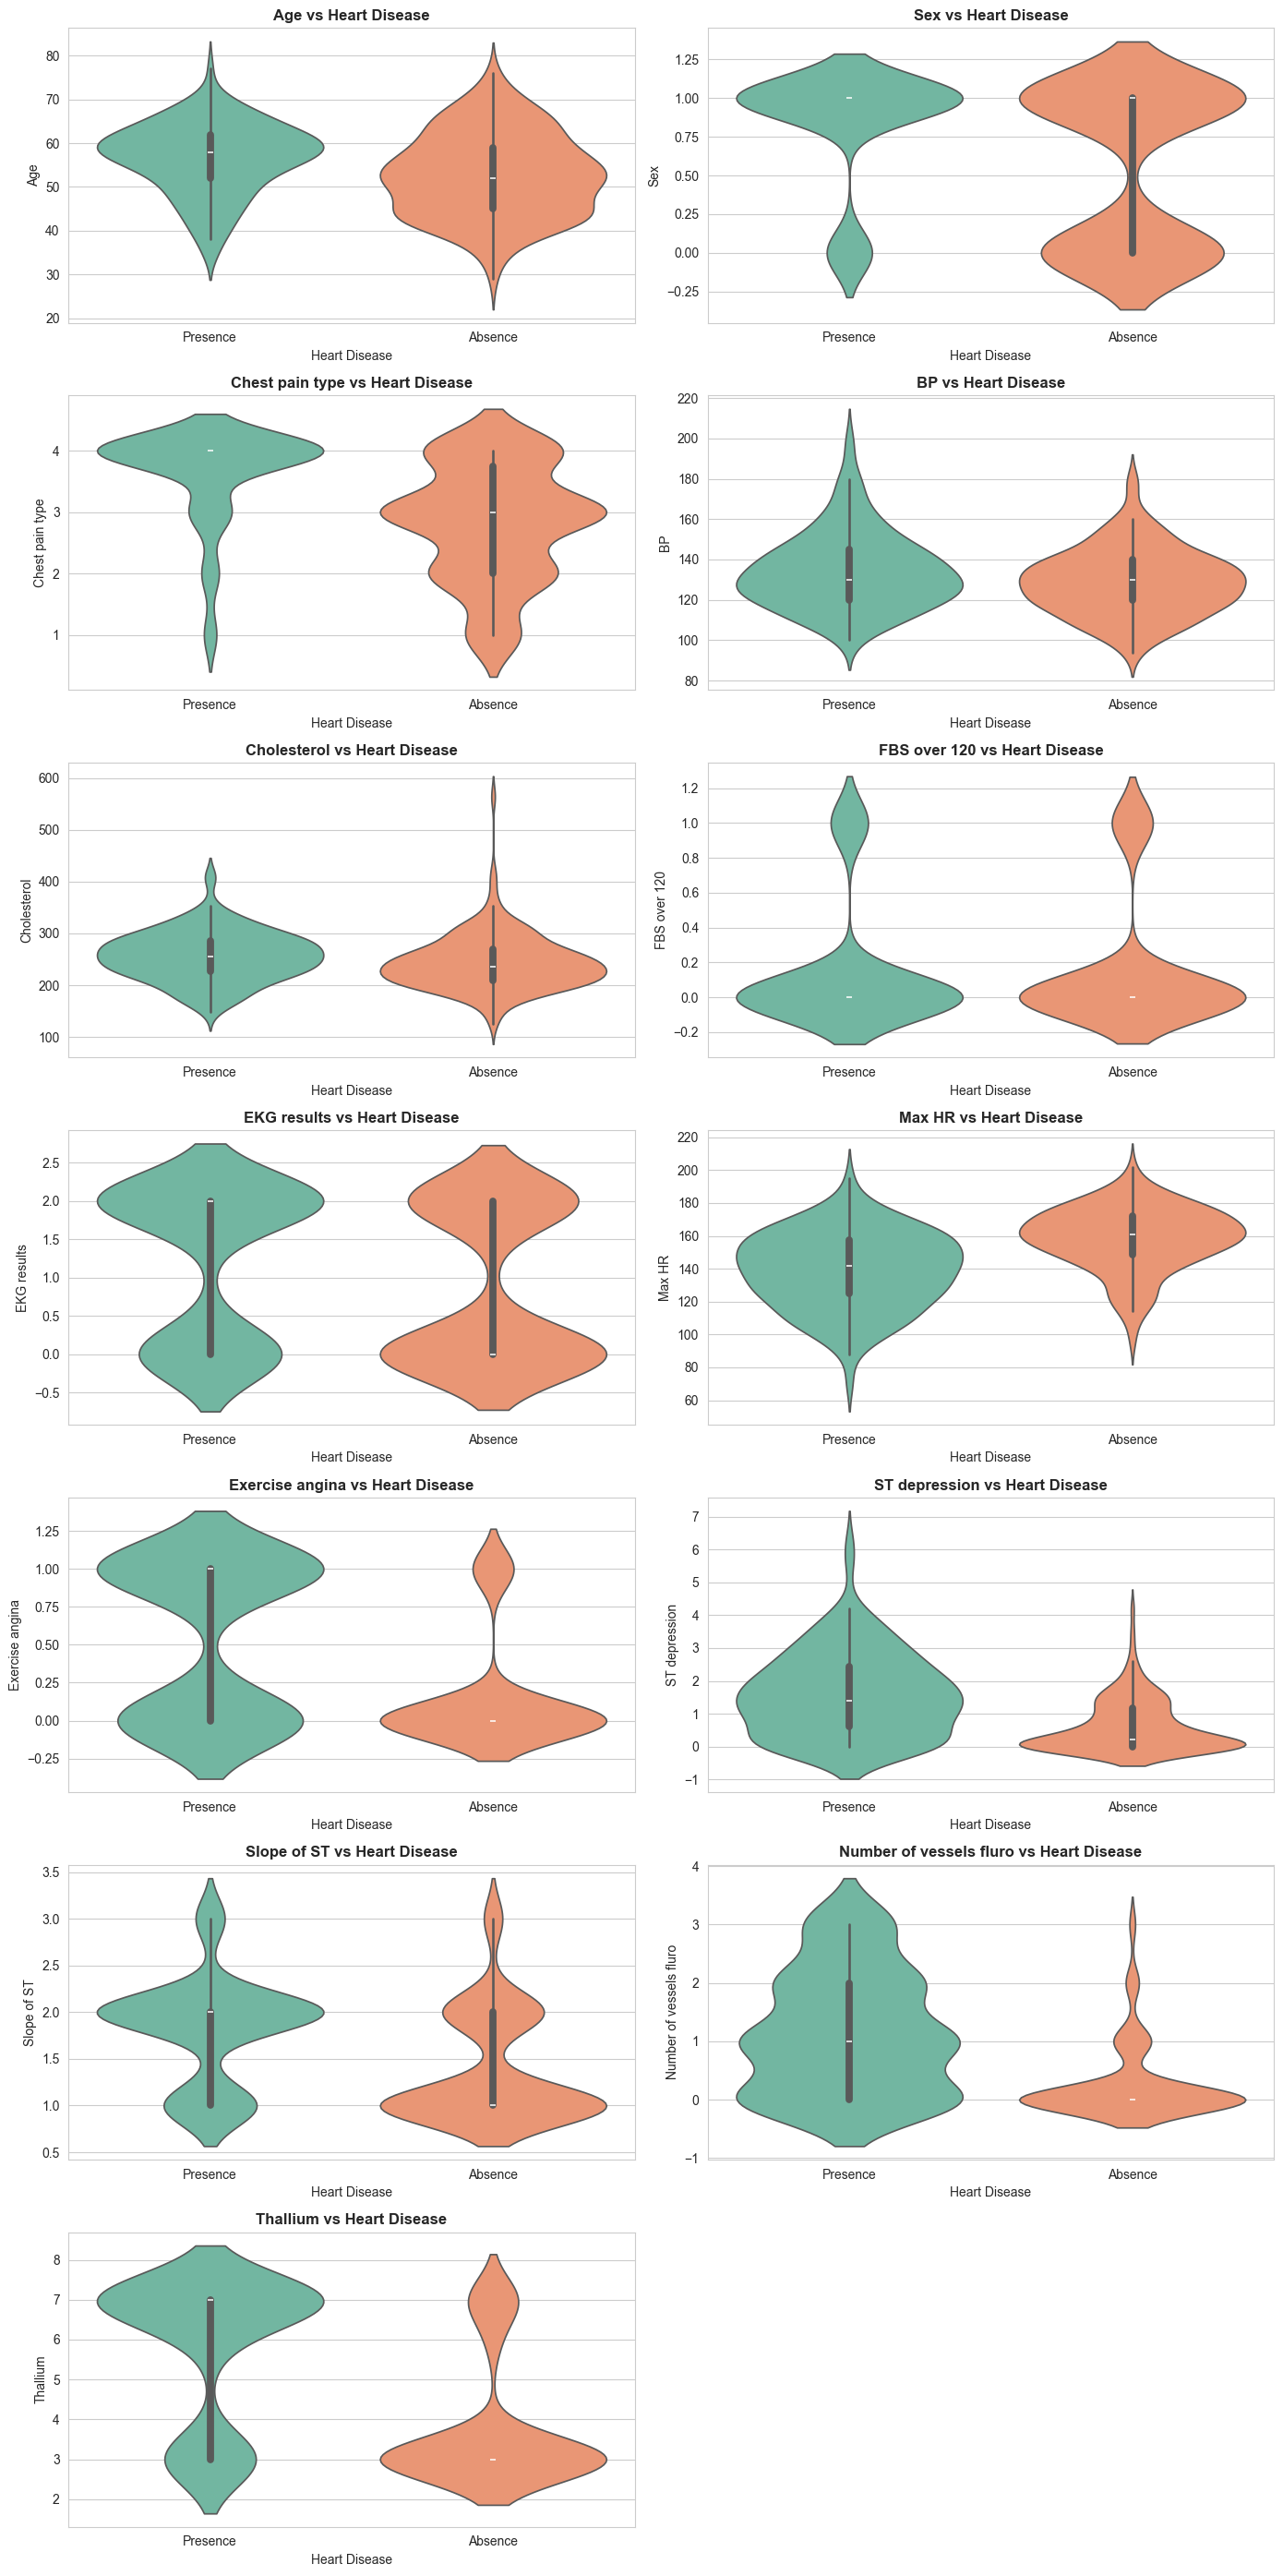


✅ Exploratory Data Analysis completed successfully!


In [6]:
# ========================================
# 4.1 Basic Information about Dataset
# ========================================

print("="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

print("\n" + "="*60)
print("COLUMN INFORMATION")
print("="*60)
df.info()

print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
print(df.describe())

print("\n" + "="*60)
print("DATA TYPES")
print("="*60)
print(df.dtypes)

# ========================================
# 4.2 Check Missing Values
# ========================================

print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])

if missing_df['Missing Values'].sum() == 0:
    print("✅ No missing values found in the dataset!")
else:
    print(f"⚠️ Total missing values: {missing_df['Missing Values'].sum()}")

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ========================================
# 4.3 Check Duplicate Values
# ========================================

print("\n" + "="*60)
print("DUPLICATE VALUES ANALYSIS")
print("="*60)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"⚠️ Found {duplicates} duplicate rows ({(duplicates/len(df)*100):.2f}%)")
else:
    print("✅ No duplicate rows found!")

# ========================================
# 4.4 Target Variable Analysis
# ========================================

print("\n" + "="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)

# Identify target column (usually named 'target', 'disease', 'condition', etc.)
target_candidates = ['target', 'disease', 'condition', 'heart_disease', 'output', 'HeartDisease']
target_col = None
for col in target_candidates:
    if col in df.columns:
        target_col = col
        break

# If not found, assume last column is target
if target_col is None:
    target_col = df.columns[-1]
    
print(f"Target Column: '{target_col}'")
print(f"\nValue Counts:")
print(df[target_col].value_counts())
print(f"\nPercentage Distribution:")
print(df[target_col].value_counts(normalize=True) * 100)

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x=target_col, palette='Set2', ax=axes[0])
axes[0].set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
df[target_col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], colors=sns.color_palette('Set2'))
axes[1].set_title('Target Variable Percentage', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Check class imbalance
class_counts = df[target_col].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\n📊 Class Imbalance Ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 1.5:
    print("⚠️ Warning: Dataset is imbalanced. Consider using techniques like SMOTE, class weights, or stratified sampling.")
else:
    print("✅ Dataset is relatively balanced.")

# ========================================
# 4.5 Numerical Features Analysis
# ========================================

print("\n" + "="*60)
print("NUMERICAL FEATURES ANALYSIS")
print("="*60)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print(f"Numerical features: {len(numerical_cols)}")
print(numerical_cols)

# Distribution of numerical features
if len(numerical_cols) > 0:
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        if idx < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[idx], color='skyblue')
            axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequency')
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Box plots for outlier detection
if len(numerical_cols) > 0:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        if idx < len(axes):
            sns.boxplot(y=df[col], ax=axes[idx], color='lightcoral')
            axes[idx].set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
            axes[idx].set_ylabel(col)
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# ========================================
# 4.6 Categorical Features Analysis
# ========================================

print("\n" + "="*60)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*60)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Also include numerical columns with few unique values (likely categorical)
for col in numerical_cols:
    if df[col].nunique() < 10:
        categorical_cols.append(col)
        
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print(f"Categorical features: {len(categorical_cols)}")
print(categorical_cols)

# Visualize categorical features
if len(categorical_cols) > 0:
    n_cols = 2
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    for idx, col in enumerate(categorical_cols):
        if idx < len(axes):
            df[col].value_counts().plot(kind='bar', ax=axes[idx], color='teal')
            axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Count')
            axes[idx].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# ========================================
# 4.7 Correlation Analysis
# ========================================

print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Only use numerical target if possible, else skip target in correlation
try:
    # Check if target is numeric
    if pd.api.types.is_numeric_dtype(df[target_col]):
        corr_df = df[numerical_cols + [target_col]].corr()
    else:
        print(f"Target column '{target_col}' is non-numeric (e.g. string labels: {df[target_col].unique()[:5]}). Skipping target in correlation matrix.")
        corr_df = df[numerical_cols].corr()
except Exception as e:
    print(f"Error calculating correlation matrix: {e}")
    corr_df = df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Features most correlated with target (if target is numeric)
if target_col in corr_df.columns:
    print(f"\nFeatures correlation with target ('{target_col}'):")
    target_corr = corr_df[target_col].abs().sort_values(ascending=False)
    print(target_corr.drop(target_col))
    # Visualize top correlations
    top_n = min(10, len(target_corr)-1)
    plt.figure(figsize=(10, 6))
    target_corr.drop(target_col).head(top_n).plot(kind='barh', color='steelblue')
    plt.title(f'Top {top_n} Features Correlated with Target', fontsize=14, fontweight='bold')
    plt.xlabel('Absolute Correlation')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
else:
    print(f"Target column '{target_col}' is not numeric, skipping correlation with target.")

# ========================================
# 4.8 Feature Relationships with Target
# ========================================

print("\n" + "="*60)
print("FEATURE RELATIONSHIPS WITH TARGET")
print("="*60)

# For numerical features - violin plots
if len(numerical_cols) > 0:
    n_cols = 2
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        if idx < len(axes):
            sns.violinplot(data=df, x=target_col, y=col, ax=axes[idx], palette='Set2')
            axes[idx].set_title(f'{col} vs {target_col}', fontsize=12, fontweight='bold')
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

print("\n✅ Exploratory Data Analysis completed successfully!")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

DATA PREPROCESSING
✅ Created copy of original dataset
Shape: (270, 14)

HANDLING MISSING VALUES
Missing values before: 0
✅ No missing values to handle

HANDLING DUPLICATE VALUES
Duplicate rows before: 0
✅ No duplicate rows to handle
Shape after removing duplicates: (270, 14)

HANDLING OUTLIERS (IQR METHOD)
  - Chest pain type: 20 outliers (7.41%) capped
  - BP: 9 outliers (3.33%) capped
  - Cholesterol: 5 outliers (1.85%) capped
  - FBS over 120: 40 outliers (14.81%) capped
  - Max HR: 1 outliers (0.37%) capped
  - ST depression: 4 outliers (1.48%) capped
  - Number of vessels fluro: 19 outliers (7.04%) capped

✅ Handled outliers in 7 columns using capping method


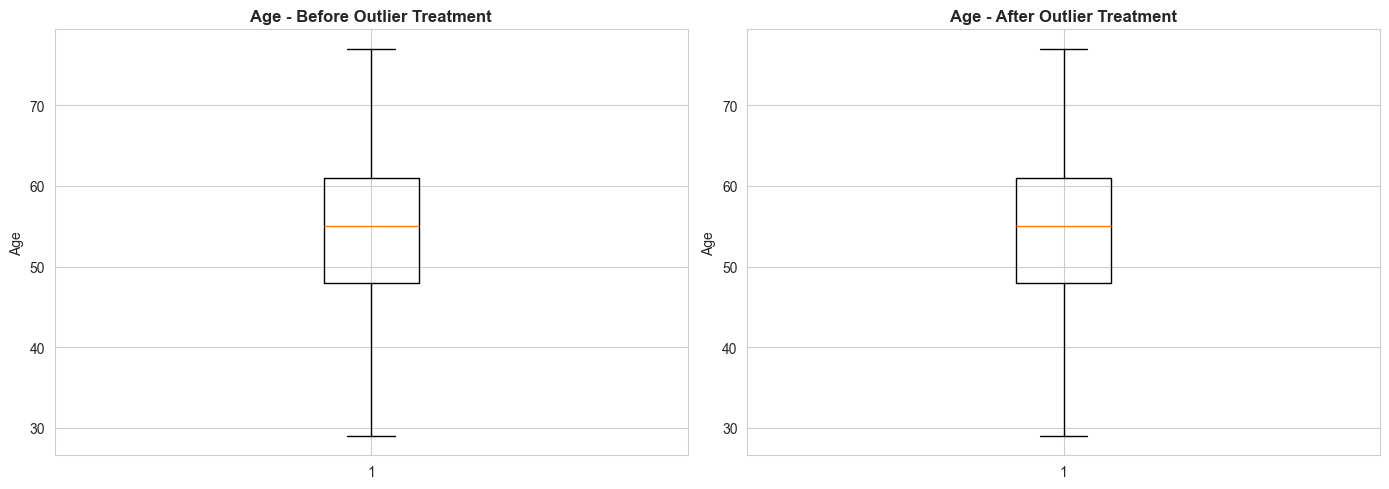


ENCODING CATEGORICAL VARIABLES
Found 1 categorical columns: ['Heart Disease']

  - Heart Disease: 2 unique values
    Applied Label Encoding

✅ Categorical encoding completed
New shape after encoding: (270, 14)

FEATURE SCALING (STANDARDIZATION)
Features shape: (270, 13)
Target shape: (270,)

✅ Features scaled using StandardScaler
Mean of scaled features: 0.000000
Std of scaled features: 0.924791


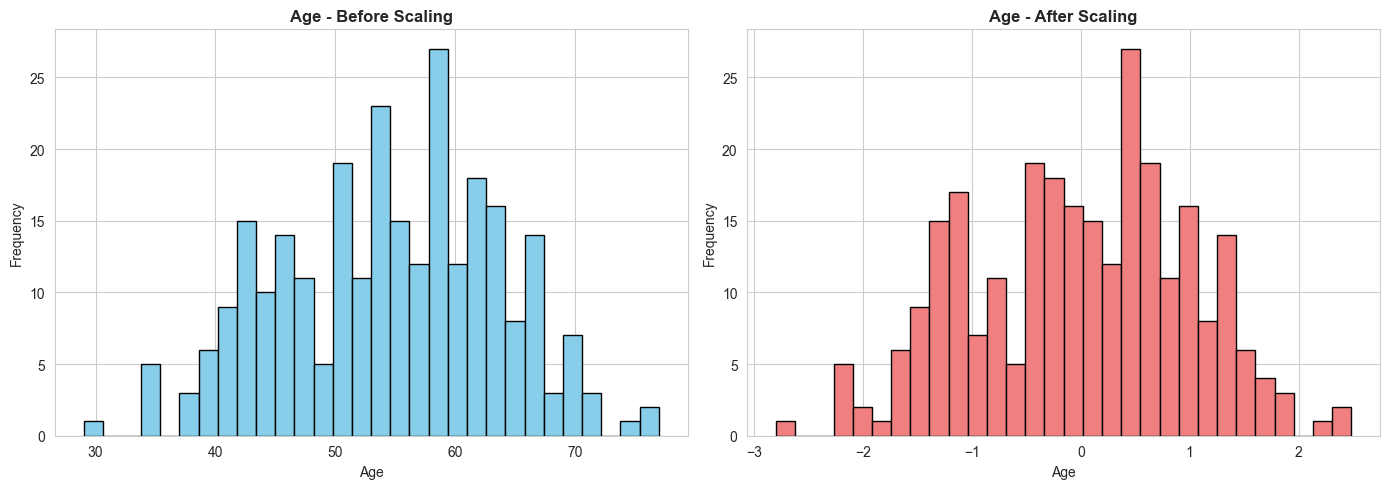


SPLITTING DATA
Training set size: 216 (80.0%)
Test set size: 54 (20.0%)

Training set target distribution:
Heart Disease
0    120
1     96
Name: count, dtype: int64

Test set target distribution:
Heart Disease
0    30
1    24
Name: count, dtype: int64

SAVING PREPROCESSED DATA
✅ Preprocessed data saved to: preprocessing/heart_disease_preprocessed\heart_disease_preprocessed.csv
Final dataset shape: (270, 14)
✅ Training data saved to: preprocessing/heart_disease_preprocessed\train_data.csv
✅ Test data saved to: preprocessing/heart_disease_preprocessed\test_data.csv

PREPROCESSING SUMMARY
Original dataset shape: (270, 14)
Final dataset shape: (270, 14)
Features: 13
Samples: 270
Target variable: Heart Disease
Target classes: [1 0]

✅ Data preprocessing completed successfully!
✅ Data is now ready for model training!


In [10]:
# ========================================
# 5.1 Create a Copy of Original Data
# ========================================

print("="*60)
print("DATA PREPROCESSING")
print("="*60)

# Create a copy to preserve original data
df_processed = df.copy()
print(f"✅ Created copy of original dataset")
print(f"Shape: {df_processed.shape}")

# ========================================
# 5.2 Handle Missing Values
# ========================================

print("\n" + "="*60)
print("HANDLING MISSING VALUES")
print("="*60)

missing_before = df_processed.isnull().sum().sum()
print(f"Missing values before: {missing_before}")

if missing_before > 0:
    # For numerical columns: fill with median
    for col in df_processed.select_dtypes(include=['int64', 'float64']).columns:
        if df_processed[col].isnull().sum() > 0:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
            print(f"  - Filled {col} with median: {median_val}")
    
    # For categorical columns: fill with mode
    for col in df_processed.select_dtypes(include=['object', 'category']).columns:
        if df_processed[col].isnull().sum() > 0:
            mode_val = df_processed[col].mode()[0]
            df_processed[col].fillna(mode_val, inplace=True)
            print(f"  - Filled {col} with mode: {mode_val}")
    
    missing_after = df_processed.isnull().sum().sum()
    print(f"\n✅ Missing values after: {missing_after}")
else:
    print("✅ No missing values to handle")

# ========================================
# 5.3 Handle Duplicate Values
# ========================================

print("\n" + "="*60)
print("HANDLING DUPLICATE VALUES")
print("="*60)

duplicates_before = df_processed.duplicated().sum()
print(f"Duplicate rows before: {duplicates_before}")

if duplicates_before > 0:
    df_processed.drop_duplicates(inplace=True)
    duplicates_after = df_processed.duplicated().sum()
    print(f"✅ Duplicate rows after: {duplicates_after}")
    print(f"Removed {duplicates_before - duplicates_after} duplicate rows")
else:
    print("✅ No duplicate rows to handle")

print(f"Shape after removing duplicates: {df_processed.shape}")

# ========================================
# 5.4 Handle Outliers (IQR Method)
# ========================================

print("\n" + "="*60)
print("HANDLING OUTLIERS (IQR METHOD)")
print("="*60)

# Identify numerical columns (excluding target)
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

outliers_info = {}
df_no_outliers = df_processed.copy()

for col in numerical_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = ((df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound)).sum()
    
    if outliers > 0:
        outliers_info[col] = {
            'count': outliers,
            'percentage': (outliers / len(df_no_outliers)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        
        # Cap outliers instead of removing them
        df_no_outliers[col] = df_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"  - {col}: {outliers} outliers ({outliers_info[col]['percentage']:.2f}%) capped")

if len(outliers_info) > 0:
    print(f"\n✅ Handled outliers in {len(outliers_info)} columns using capping method")
else:
    print("✅ No significant outliers detected")

# Compare before and after
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for col in numerical_cols[:1]:  # Show first numerical column as example
    axes[0].boxplot(df_processed[col], vert=True)
    axes[0].set_title(f'{col} - Before Outlier Treatment', fontweight='bold')
    axes[0].set_ylabel(col)
    
    axes[1].boxplot(df_no_outliers[col], vert=True)
    axes[1].set_title(f'{col} - After Outlier Treatment', fontweight='bold')
    axes[1].set_ylabel(col)

plt.tight_layout()
plt.show()

df_processed = df_no_outliers.copy()

# ========================================
# 5.5 Encode Categorical Variables
# ========================================

print("\n" + "="*60)
print("ENCODING CATEGORICAL VARIABLES")
print("="*60)

# Identify categorical columns
categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns.tolist()

if len(categorical_cols) > 0:
    print(f"Found {len(categorical_cols)} categorical columns: {categorical_cols}")
    
    # Label Encoding for binary categories
    le = LabelEncoder()
    
    for col in categorical_cols:
        unique_values = df_processed[col].nunique()
        print(f"\n  - {col}: {unique_values} unique values")
        
        if unique_values == 2:
            # Binary encoding
            df_processed[col] = le.fit_transform(df_processed[col])
            print(f"    Applied Label Encoding")
        else:
            # One-hot encoding for multi-class
            df_processed = pd.get_dummies(df_processed, columns=[col], prefix=col, drop_first=True)
            print(f"    Applied One-Hot Encoding")
    
    print(f"\n✅ Categorical encoding completed")
    print(f"New shape after encoding: {df_processed.shape}")
else:
    print("✅ No categorical columns to encode")

# ========================================
# 5.6 Feature Scaling (Standardization)
# ========================================

print("\n" + "="*60)
print("FEATURE SCALING (STANDARDIZATION)")
print("="*60)

# Separate features and target
X = df_processed.drop(columns=[target_col])
y = df_processed[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(f"\n✅ Features scaled using StandardScaler")
print(f"Mean of scaled features: {X_scaled.mean().mean():.6f}")
print(f"Std of scaled features: {X_scaled.std().mean():.6f}")

# Visualize before and after scaling (first feature as example)
if len(X.columns) > 0:
    sample_col = X.columns[0]
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].hist(X[sample_col], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title(f'{sample_col} - Before Scaling', fontweight='bold')
    axes[0].set_xlabel(sample_col)
    axes[0].set_ylabel('Frequency')
    
    axes[1].hist(X_scaled[sample_col], bins=30, color='lightcoral', edgecolor='black')
    axes[1].set_title(f'{sample_col} - After Scaling', fontweight='bold')
    axes[1].set_xlabel(sample_col)
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# ========================================
# 5.7 Split Data into Train and Test Sets
# ========================================

print("\n" + "="*60)
print("SPLITTING DATA")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set size: {X_train.shape[0]} ({(X_train.shape[0]/len(X_scaled)*100):.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({(X_test.shape[0]/len(X_scaled)*100):.1f}%)")
print(f"\nTraining set target distribution:")
print(y_train.value_counts())
print(f"\nTest set target distribution:")
print(y_test.value_counts())

# ========================================
# 5.8 Save Preprocessed Data
# ========================================

print("\n" + "="*60)
print("SAVING PREPROCESSED DATA")
print("="*60)

# Create preprocessing folder if not exists
import os
preprocessing_folder = 'preprocessing/heart_disease_preprocessed'
if not os.path.exists(preprocessing_folder):
    os.makedirs(preprocessing_folder)
    print(f"✅ Created folder: {preprocessing_folder}")

# Save preprocessed dataset
output_file = os.path.join(preprocessing_folder, 'heart_disease_preprocessed.csv')
df_final = pd.concat([X_scaled, y], axis=1)
df_final.to_csv(output_file, index=False)

print(f"✅ Preprocessed data saved to: {output_file}")
print(f"Final dataset shape: {df_final.shape}")

# Save train and test sets separately
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_file = os.path.join(preprocessing_folder, 'train_data.csv')
test_file = os.path.join(preprocessing_folder, 'test_data.csv')

train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

print(f"✅ Training data saved to: {train_file}")
print(f"✅ Test data saved to: {test_file}")

print("\n" + "="*60)
print("PREPROCESSING SUMMARY")
print("="*60)
print(f"Original dataset shape: {df.shape}")
print(f"Final dataset shape: {df_final.shape}")
print(f"Features: {X_scaled.shape[1]}")
print(f"Samples: {df_final.shape[0]}")
print(f"Target variable: {target_col}")
print(f"Target classes: {y.unique()}")
print("\n✅ Data preprocessing completed successfully!")
print("✅ Data is now ready for model training!")